In [2]:
import pandas as pd
from pandas import Series , DataFrame
#import 만 했을 경우에는 pandas 라이브러리 안에 요소를 호출 시 pd.요소로 호출해야함
#from을 이용했을 경우, pandas 내 Series와 DataFrame은 pandas를 붙이지 않고 바로 요소를 사용할 수 있도록 설정
import numpy as np


In [8]:


df = DataFrame([[3000,2000,3200,2100], 
              [2000,1700,2600,1800],
               [1500,2000,1500,13000]])
print(df)
df = df.T
print(df)
df.columns = ['daum', 'naver', 'sk']
print(df)

      0     1     2      3
0  3000  2000  3200   2100
1  2000  1700  2600   1800
2  1500  2000  1500  13000
      0     1      2
0  3000  2000   1500
1  2000  1700   2000
2  3200  2600   1500
3  2100  1800  13000
   daum  naver     sk
0  3000   2000   1500
1  2000   1700   2000
2  3200   2600   1500
3  2100   1800  13000


In [9]:
#상관계수
#두 개 사이의 변화량의 관계 파악
print(df.corr())

           daum     naver        sk
daum   1.000000  0.866618 -0.551247
naver  0.866618  1.000000 -0.400942
sk    -0.551247 -0.400942  1.000000


In [11]:
#두 변수 사이에만 상관계수를 파악하고 싶을 경우
print(df['daum'].corr(df['naver']))
print(df.daum.corr(df['naver']))

0.86661768362


In [12]:
#회귀분석 : Spicy 이용 
from scipy import stats
des = stats.linregress(df.daum, df.naver)
print(des)

# LinregressResult(slope=0.56984478935698446, intercept=557.64966740576506, 
#                  rvalue=0.86661768361994251, pvalue=0.13338231638005746, 
#                  stderr=0.23200153187633407)

#slope 기울기
#intercept : 절편
#rvalue : 상관도
#pvalue : 오류 : 0.1~0.5 is ok


LinregressResult(slope=0.56984478935698446, intercept=557.64966740576506, rvalue=0.86661768361994251, pvalue=0.13338231638005746, stderr=0.23200153187633407)


In [13]:
# 다음으로 네이버를 이제 예측할 수 있다. how? with slope and intercept
slope, intercept, rvalue,pvalue,stderr = stats.linregress(df.daum, df.naver)
print("다음이 5000일 때 네이버의 예측 값 : ", 5000*slope + intercept)

다음이 5000일 때 네이버의 예측 값 :  3406.87361419


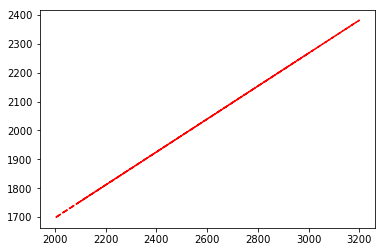

In [15]:
from scipy import polyval
import matplotlib as plt #그래프나 그림 출력 시 사용되는 라이브러리
from pylab import plot,title,show,legend

ry = polyval([slope, intercept], df['daum'])
plot(df.daum, ry, 'r--') #r--, k- ; color
show()